# **Milestone 1**

##**Context**
 
 - Why is this problem important to solve?

##**Objective**

 - What is the intended goal?

##**Key questions**

- What are the key questions that need to be answered?

##**Problem Formulation**:

- What is it that we are trying to solve using data science?

##**Attributes Information:**

This datset is the past monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###**Loading the libraries**

In [ ]:
# Uncomment to upgrade statsmodels
#!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.2 MB/s 
     |████████████████████████████████| 233 kB 58.5 MB/s 
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
#Import basic libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

###**Loading the data**

In [3]:
df = pd.read_excel('MER_T12_06.xlsx')
df.head()

,MSN,YYYYMM,Value,Description
0,CLEIEUS,197301,72.076,Coal Electric Power Sector CO2 Emissions
1,CLEIEUS,197302,64.442,Coal Electric Power Sector CO2 Emissions
2,CLEIEUS,197303,64.084,Coal Electric Power Sector CO2 Emissions
3,CLEIEUS,197304,60.842,Coal Electric Power Sector CO2 Emissions
4,CLEIEUS,197305,61.798,Coal Electric Power Sector CO2 Emissions


In [4]:
#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

In [5]:
#conversion of "YYYYMM" columnn into standard datetime format & making it as index
# We are using errors=’coerce’. It will replace all non-numeric values with NaN.

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel('MER_T12_06.xlsx', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head(15)

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions
1973-06-01,CLEIEUS,66.538,Coal Electric Power Sector CO2 Emissions
1973-07-01,CLEIEUS,72.626,Coal Electric Power Sector CO2 Emissions
1973-08-01,CLEIEUS,75.181,Coal Electric Power Sector CO2 Emissions
1973-09-01,CLEIEUS,68.397,Coal Electric Power Sector CO2 Emissions


**The arguments can be explained as:**

- **parse_dates:** This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- **index_col:** This is a key that forces pandas to use the date time column as index.
- **date_parser:** Converts an input string into datetime variable.

- Let us first identify and **drop the non datetimeindex** rows. First, let's convert the index to datetime, coerce errors, and filter NaT

In [6]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions


In [7]:
#Check the datatypes of each column. Hint: Use dtypes method
ts.dtypes

MSN            object
Value          object
Description    object
dtype: object

In [8]:
#convert the emision value into numeric value
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions


In [9]:
#Check total number of missing values of each column. Hint: Use isnull() method
print(f'Check nulls in any column using is isnull() method\n {ts.isnull().sum()}')
print('\n\nAlternativalely use info() method\n')
ts.info()

Check nulls in any column using is isnull() method
 MSN              0
Value          384
Description      0
dtype: int64


Alternativalely use info() method

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4707 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4707 non-null   object 
dtypes: float64(1), object(2)
memory usage: 147.1+ KB


In [10]:
#Drop the missing value using dropna(inplace = True)
ts.dropna(inplace = True)

###**Dataset visualization**

- The dataset has 8 energy sources of CO2 emission. 
- Group the CO2 Emission dataset based on the type of energy source.

In [11]:
energy_sources  =ts.groupby('Description')
energy_sources.head()

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions
1973-01-01,NNEIEUS,12.175,Natural Gas Electric Power Sector CO2 Emissions
1973-02-01,NNEIEUS,11.708,Natural Gas Electric Power Sector CO2 Emissions
1973-03-01,NNEIEUS,13.994,Natural Gas Electric Power Sector CO2 Emissions
1973-04-01,NNEIEUS,14.627,Natural Gas Electric Power Sector CO2 Emissions


####**Visualize the dependency of the emission in the power generation with time.**

In [13]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

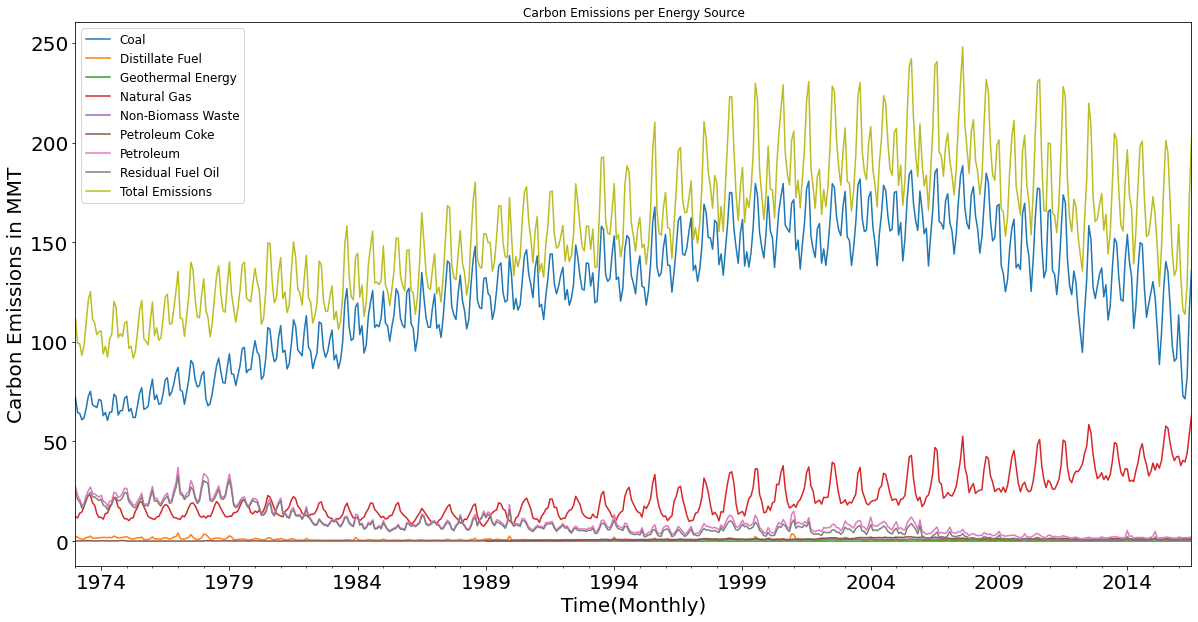

In [14]:
description = ts.groupby('Description')['Value'].sum().sort_values()
x = description.index.tolist()
label_dict = dict(zip(x, cols))  
fig, ax = plt.subplots(figsize = (20, 10))
for desc, group in energy_sources:
    group.plot(y='Value', label=label_dict[desc],ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 12)

- **Observations and Insights:**
- Obviousely the CO2 emission from coal comes in the first place followed by natural gas.
- We can see that coal started to decrease since around 2006. And antural gas started to increase from aroung 2009.
- From 1980 on Residual Fuel Oil and Petroleum started to descrease.


#### **Visualize the trend of CO2 emission from each energy source individually**

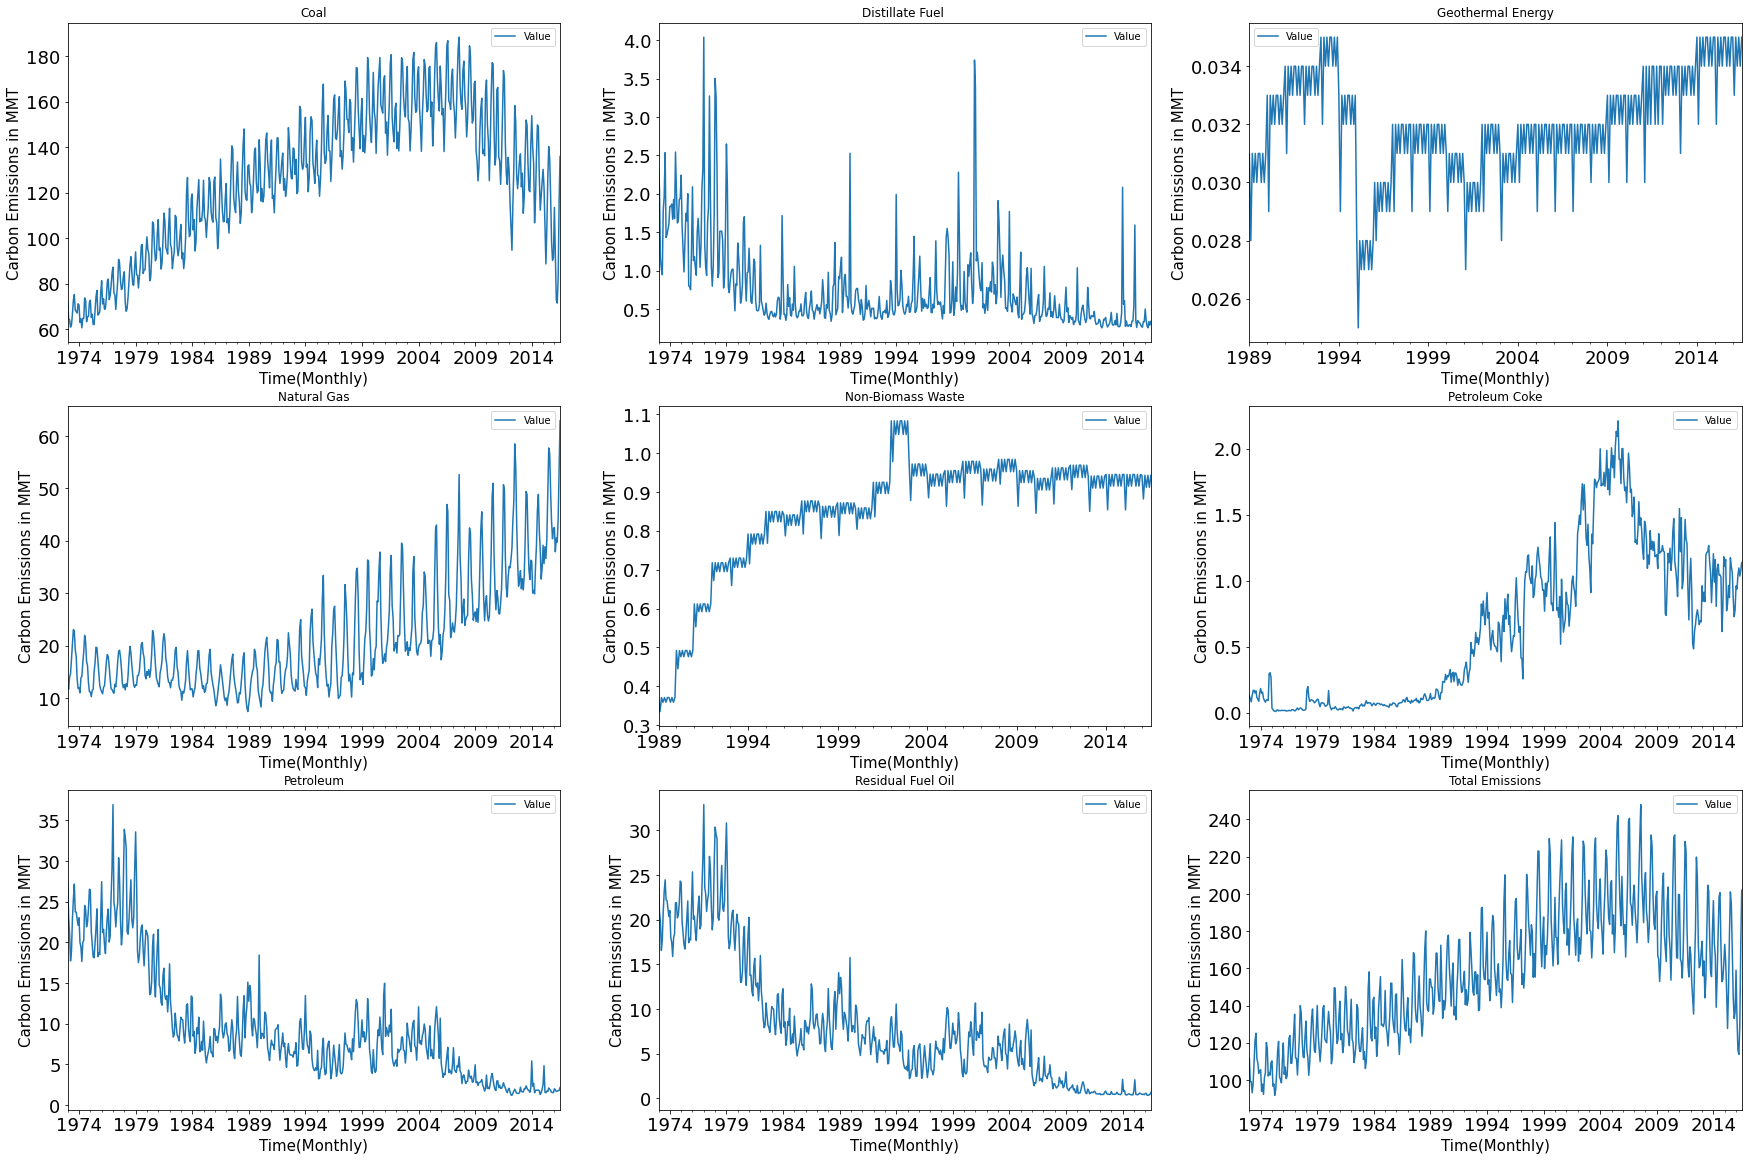

In [15]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
x_tick = np.arange(len(cols))
for (desc, group), ax in zip(energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=label_dict[desc], fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

#### **Observations and Insights: **
- The CO2 emission from coal shows a trend of increment from 1973 to 2006- 2007 and then declines till 2016
- Similiar to coal we can see "Total Energy Electric Power" has the same trend.
- In recent years, the natural gas consumption has been increasing. However, the use of coal for power generation has been declining.
- Residual Fuel Oil and Petroleum Electric acts the same and are decreasing since around 1980.


####**Bar chart of CO2 Emissions per energy source**

In [16]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [17]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

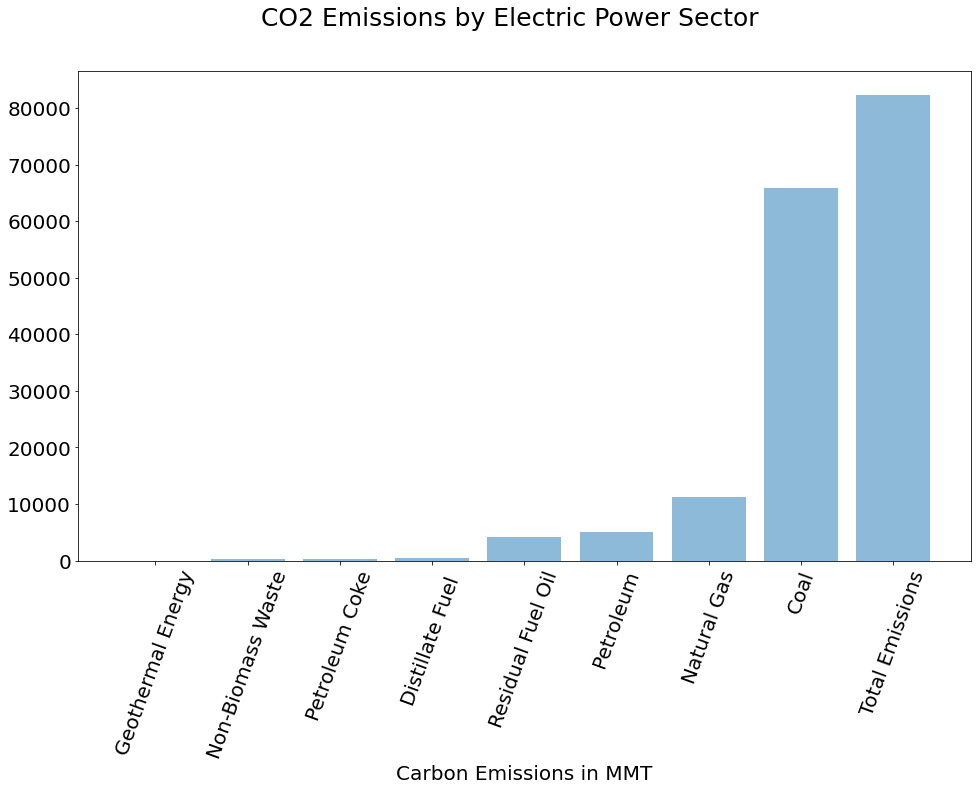

In [18]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

####**For developing the time series model and forcasting, use the natural gas CO2 emission from the electirical power generation**


In [19]:
emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
emissions= emissions.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
mte = emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()


YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

####**Observations & insights:**
- We can see that the contribution of coal to the total CO2 emission is significant followed by natural gas
- Because of the decreasing trend in coal. it is more important to consider natural gas as the source for caron emission in the feature because is increasing significantly at the last years.   

##**Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

**Milestone 2**

### **Natural gas based CO2 emission forecasting**

For developing the time series model and forecasting, you are expected to use the natural gas CO2 emission from the electrical power generation. We need to slice this data:

In [21]:
###Slice the data to get the monthly total CO2 emissions of Natural Gas Electric Power Sector
emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
mte = emissions[emissions['Description'] =="Natural Gas Electric Power Sector CO2 Emissions"]
mte = mte.drop(['Description'], axis=1)

In [22]:
mte.head()

,Value
YYYYMM,
1973-01-01,12.175
1973-02-01,11.708
1973-03-01,13.994
1973-04-01,14.627
1973-05-01,17.344


In [72]:
mte.tail()

,Value
YYYYMM,
2016-03-01,40.525
2016-04-01,39.763
2016-05-01,44.210
2016-06-01,53.567
2016-07-01,62.881


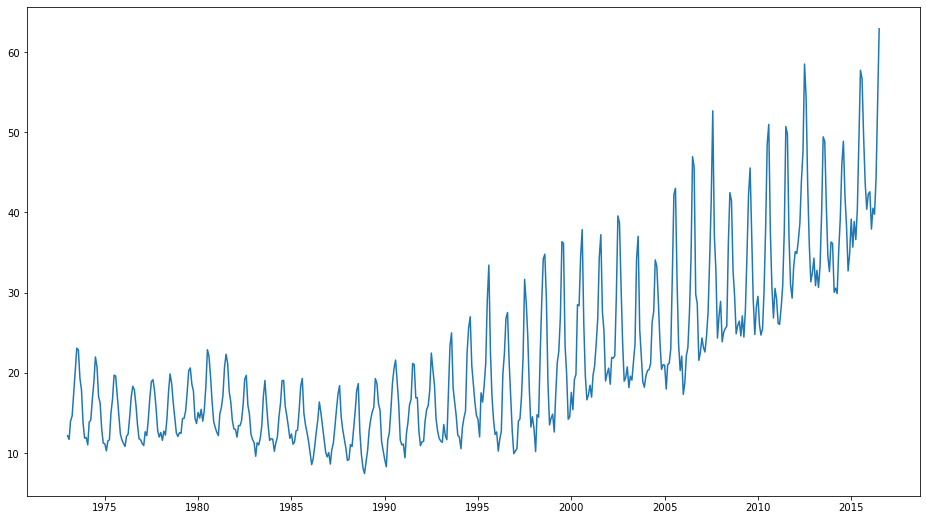

In [23]:
fig = plt.figure(figsize = (16,9))
plt.plot(mte)

###Split the dataset

In [24]:
# Split the data into train and test,I'll consider the data from the last 24 months as the test data and the remaining data as the train data.
df_train, df_test =  mte.loc['1973-01-31':'2014-08-01'], mte.loc['2014-08-01' : '2016-08-31']
print(df_train)
print(df_test)

             Value
YYYYMM            
1973-02-01  11.708
1973-03-01  13.994
1973-04-01  14.627
1973-05-01  17.344
1973-06-01  20.265
...            ...
2014-04-01  29.885
2014-05-01  35.211
2014-06-01  39.228
2014-07-01  45.901
2014-08-01  48.871

[499 rows x 1 columns]
             Value
YYYYMM            
2014-08-01  48.871
2014-09-01  41.961
2014-10-01  38.286
2014-11-01  32.703
2014-12-01  34.800
2015-01-01  39.155
2015-02-01  35.668
2015-03-01  38.872
2015-04-01  36.610
2015-05-01  40.440
2015-06-01  48.920
2015-07-01  57.712
2015-08-01  56.662
2015-09-01  49.384
2015-10-01  43.680
2015-11-01  40.394
2015-12-01  42.270
2016-01-01  42.566
2016-02-01  37.918
2016-03-01  40.525
2016-04-01  39.763
2016-05-01  44.210
2016-06-01  53.567
2016-07-01  62.881


###Test the Stationarity

In [25]:
#Import the required package

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

###Test the stationarity through Visualization

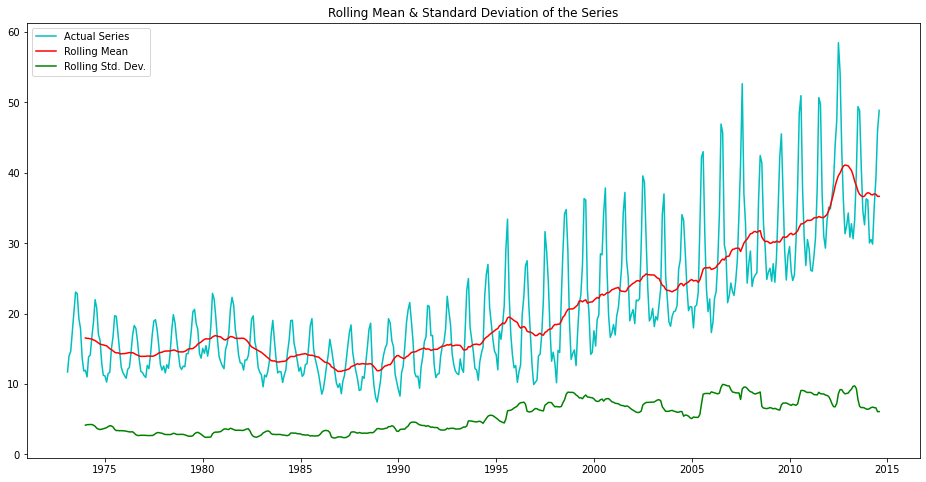

In [26]:
# Calculate the rolling mean and standard deviation for a window of 12 observations
rolmean=df_train.rolling(window=12).mean()
rolstd=df_train.rolling(window=12).std()

# Visualize the rolling mean and standard deviation
plt.figure(figsize=(16,8))
actual = plt.plot(df_train, color='c', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

**observations and Insights:**
- The emissions mean and the variation in standard deviation clearly vary with time. This shows that the series has a trend. So, it is not a stationary

### **Test the stationarity using the Augmented Dickey-Fuller Test**

Use the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not. The null and alternate hypotheses for the ADF Test are defined as:

**- Null hypothesis:** The Time Series is non-stationary


**- Alternative hypothesis:** The Time Series is stationary

In [27]:
#Define a function to use adfuller test
def adfuller(dataset):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(dataset['Value'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df_train)

Dickey-Fuller Test: 
Test Statistic            0.512910
p-value                   0.985260
Lags Used                15.000000
No. of Observations     483.000000
Critical Value (1%)      -3.443962
Critical Value (5%)      -2.867543
Critical Value (10%)     -2.569967
dtype: float64


**Observations and Insights**
1. From the above test, we can see that the p-value = 0.985 i.e. > 0.05 (For 95% confidence intervals) therefore, we fail to reject the null hypothesis.
2. Hence, we can confirm that the series is non-stationary.

###Transformation of the dataset into a stationary one

**We can use some of the following methods to convert a non-stationary series into a stationary one:**


1. Log Transformation
2. Differencing the series (lagged series)

We take the average of ‘k’ consecutive values depending on the frequency of time series (in this capstone 12 months). 

Here, we will take the average over the past 1 year.

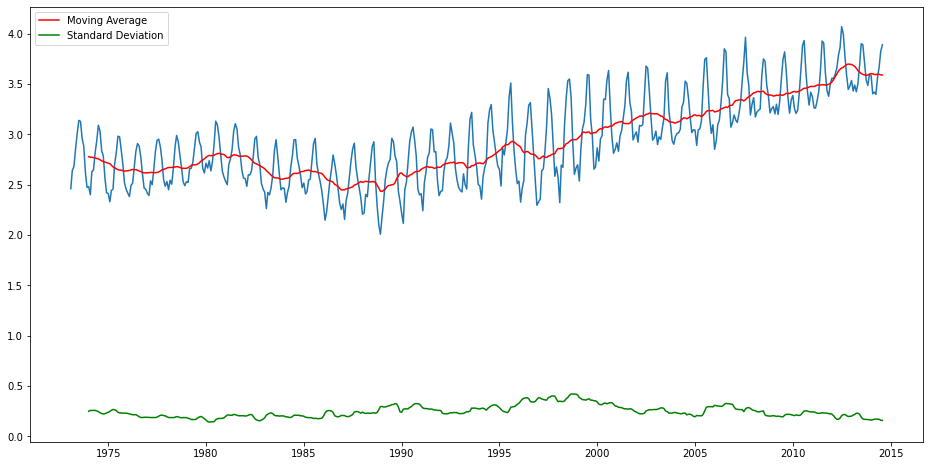

In [28]:
 # Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df_train)
MAvg = df_log.rolling(window=12).mean()
MStd = df_log.rolling(window=12).std()
plt.plot(df_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()

**Observations and Insights:**

- Since we can still see the upward trend in the series, we can conclude that the series is still non-stationary. 
- However, the standard deviation is almost constant which implies that now the series has constant variance.


**Visualize the rolling mean and rolling standard deviation of the shifted series (df_shift) and check the stationarity by calling the adfuller() function. Also, write your observations on the same.**

####Think about it:
 - Do you need to remove the null values that we get after applying differencing method?
 
 yes,because there is one NaN value that should be handled.

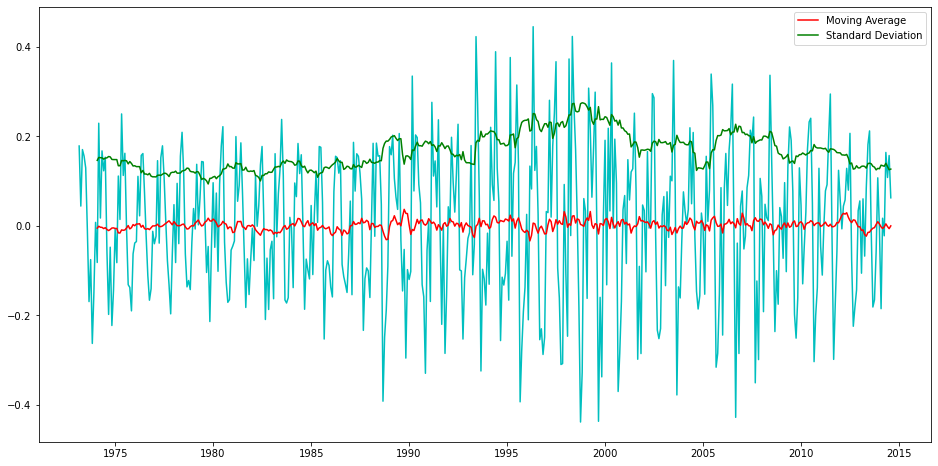

Number of values that are NaN in the data seriesis is: Value    1
dtype: int64


In [29]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg_shift = df_shift.rolling(window=12).mean()
MStd_shift = df_shift.rolling(window=12).std()
plt.plot(df_shift, color='c')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

print('Number of values that are NaN in the data seriesis is: ' + str(df_shift.isna().sum()))

#Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()


**Observations and Insights:**
- The mean and the standard deviation seem to be constant over time. Let us use the adfuller test to check the stationarity.

In [30]:
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -4.981526
p-value                   0.000024
Lags Used                18.000000
No. of Observations     479.000000
Critical Value (1%)      -3.444076
Critical Value (5%)      -2.867593
Critical Value (10%)     -2.569994
dtype: float64


**Observations and Insights:**
- We can see that the p-value is now far lesser than 0.05 (for 95% confidence interval), therefore we can reject the null hypothesis that the series is non-stationary.

We can conclude that **the series is now stationary**. Let's decompose the time series to check its different components.


### **Elimination of trend and seasonality: Decomposition**

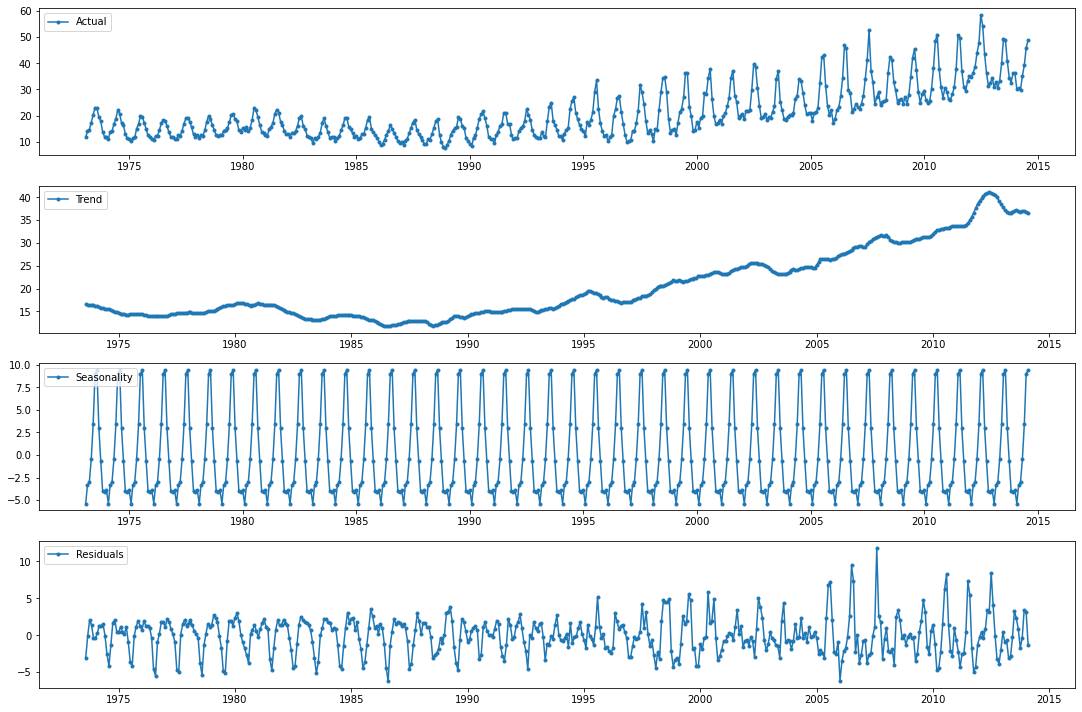

In [31]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_train)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(df_train, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

**Observations and Insights:**
- We can see that there are significant trend, seasonality and residuals components in the series

**Plot the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models**

### **Find optimal parameters (P, Q) and build the AR, MA, ARMA & ARIMA models**

**Plot the ACF and PACF charts and find the optimal parameters**

<Figure size 1152x576 with 0 Axes>

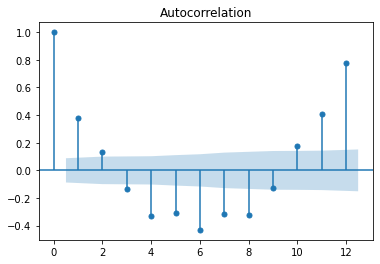

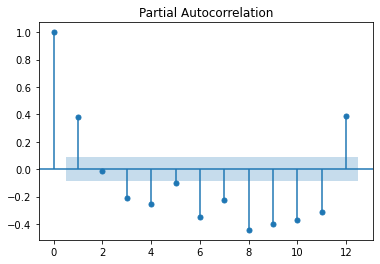

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(df_shift, lags = 12) 
plt.show() 
plot_pacf(df_shift, lags = 12) 
plt.show()

**bservations and Insights:**
- From the above PACF plot we can see that the highest lag at which the plot extends beyond the statistically significant boundary is lag 1. 
- This indicates that an AR Model of lag 1 (p=1) should be sufficient to fit the data.
- Similarly, from the ACF plot, we can infer that q=1.

**###AR Model**

Order p is the lag value after which the PACF plot crosses the upper confidence interval for the first time. These p lags will act as our features while forecasting the AR time series.

Fit and predict the shifted series with the AR Model and calculate the RMSE. Also, visualize the time series and write your observations.

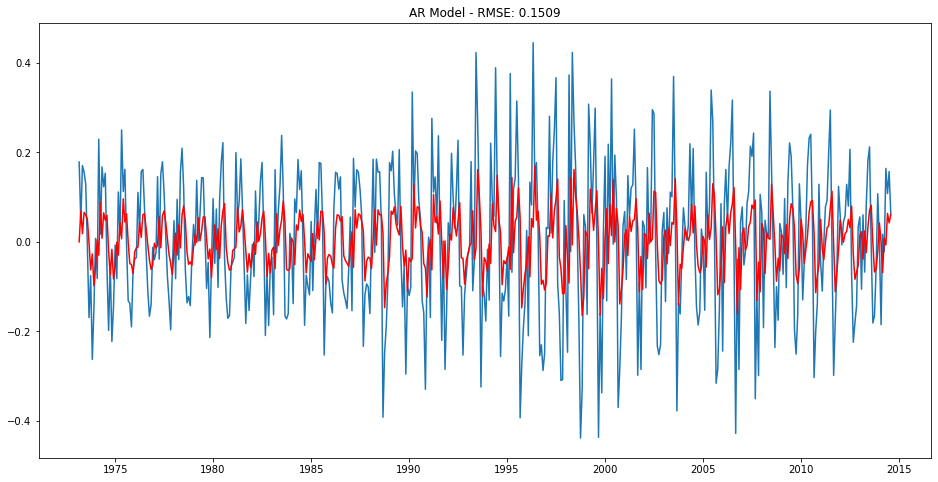

In [33]:
#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags=1) #Using number of lags as 1
results_AR = model_AR.fit()
plt.plot(df_shift)
predict = results_AR.predict(start=0,end=len(df_shift)-1)
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict,df_shift, squared=False))  #Calculating rmse
plt.show()

- We can see that by using the AR model, we get root mean squared error (RMSE) = 0.1502

In [34]:
results_AR.aic

-3.7711535472912856

Order q of the MA process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.

Fit and predict the shifted series with the MA Model and calculate the RMSE. Also, visualize the time series and write your observations.


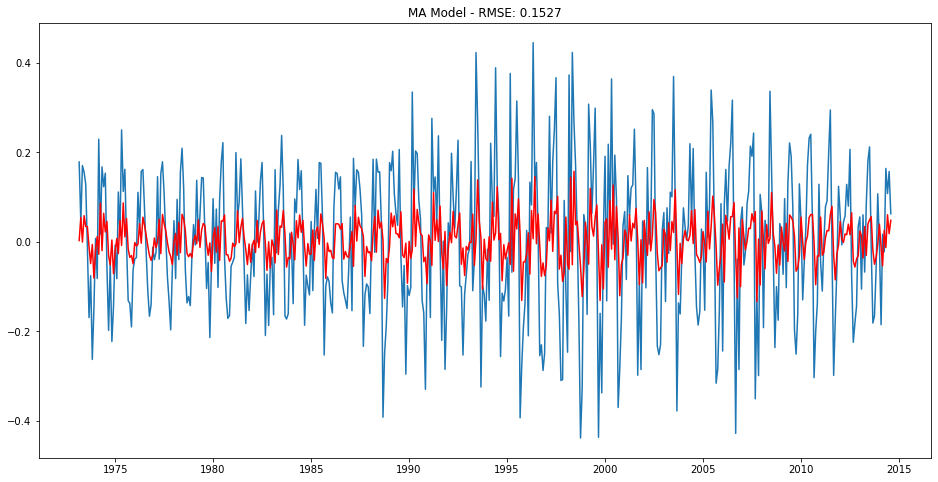

In [35]:
#We will be using an ARIMA model with p=0 and d=0 so that it will work as an MA model
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16,8))
model_MA = ARIMA(df_shift, order=(0, 0, 1)) #Using p=0, d=0, q=1
results_MA = model_MA.fit()
plt.plot(df_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues,df_shift, squared=False))
plt.show()

**Observations & Insights:**
- **The MA model is giving a slightly higher RMSE** when compared to the AR model.

Let's check the AIC value of the model

In [36]:
results_MA.aic

-452.28372431885697

**The MA model is giving a much lower AIC** when compared to the AR model, implying that **the MA model fits the training data better.**

###**ARMA MODEL**

**We will be using the above AR lag(P) & MA lag(Q) as a paramter** and d=0 in ARIMA so that it will work as an ARMA model.

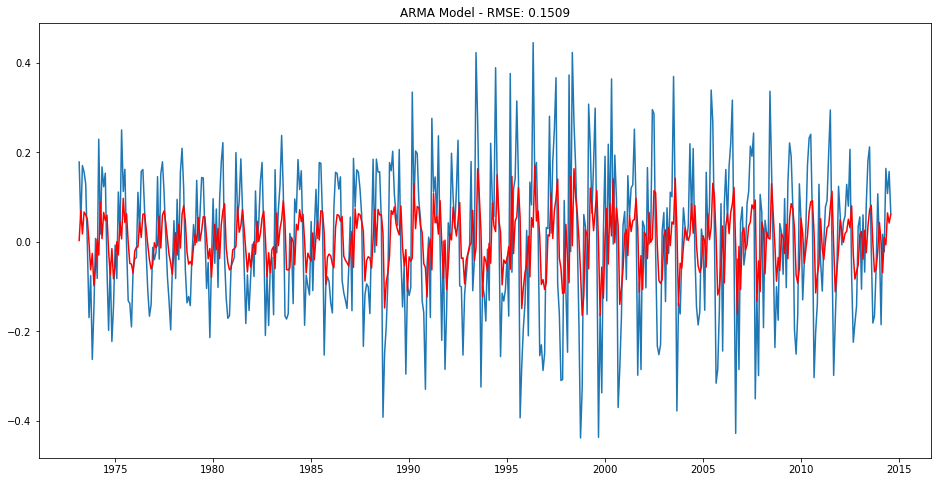

In [37]:
plt.figure(figsize=(16,8))
model_ARMA = ARIMA(df_shift, order=(1, 0, 1)) #Using p=1, d=0, q=1
results_ARMA = model_ARMA.fit()
plt.plot(df_shift)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues,df_shift, squared=False))
plt.show()

**Observations & Insights:**
- The ARMA model is giving slighlt higher RMSE as compared to MA and AR models.

**Check the AIC value of the model**

In [38]:
results_ARMA.aic

-462.50686555773126

###**ARIMA MODEL**

**Fit and predict the shifted series with the ARIMA Model and calculate the RMSE. Also, visualize the time series and write your observations.**

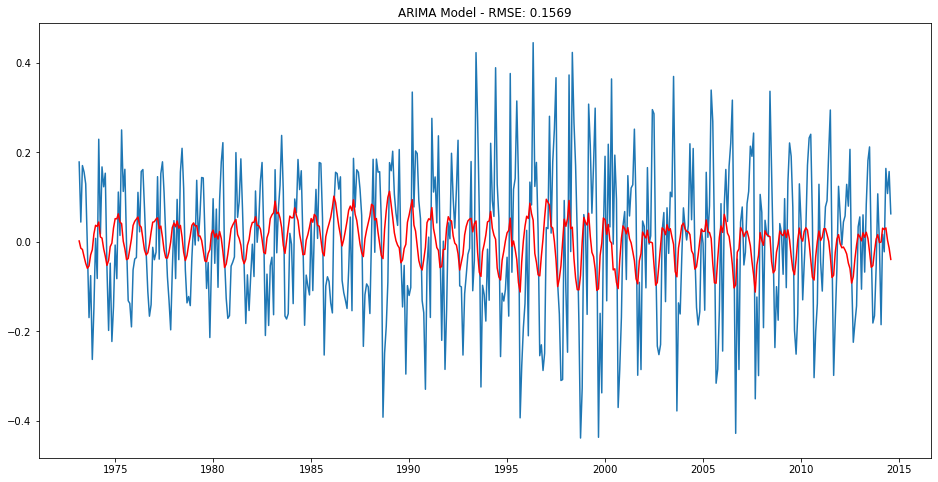

In [39]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(16,8))
model_ARIMA = ARIMA(df_log, order=(1,1,1)) #Using p=1, d=1, q=1 and apply ARIMA function on df_log series
results_ARIMA = model_ARIMA.fit() #fit the model
plt.plot(df_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues,df_shift['Value'], squared=False))
plt.show()

**Check the AIC value of the model**

In [40]:
results_ARIMA.aic

-423.31583220144967

**The AIC value of the ARIMA model**  is the same as the ARMA model. 
We can see that **all the models return almost the same RMSE.** There is not much difference in AIC value as well across all the models except for the AR model.

**We can choose to predict the values using ARIMA as it takes into account more factors than AR, MA, ARMA models.**

In [41]:
# Printing the fitted values
predictions=pd.Series(results_ARIMA.fittedvalues)
predictions

YYYYMM
1973-03-01    0.002082
1973-04-01   -0.014051
1973-05-01   -0.016849
1973-06-01   -0.033124
1973-07-01   -0.047590
                ...   
2014-04-01    0.027660
2014-05-01    0.031172
2014-06-01    0.003808
2014-07-01   -0.013761
2014-08-01   -0.039108
Length: 498, dtype: float64

###**Inverse Transformation**

**Use the correct inverse transformation depending on the model chosen to get back the original values.**

**Apply an inverse transformation on the predictions of the chosen model**

In [42]:
#Add the code blocks based on the requirements
predictions_cumsum = predictions.cumsum()
predictions_cumsum

YYYYMM
1973-03-01    0.002082
1973-04-01   -0.011969
1973-05-01   -0.028818
1973-06-01   -0.061942
1973-07-01   -0.109532
                ...   
2014-04-01    1.720339
2014-05-01    1.751510
2014-06-01    1.755318
2014-07-01    1.741557
2014-08-01    1.702449
Length: 498, dtype: float64

In [43]:
#Second step - Adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['Value'].iloc[0], index=df_log.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)
predictions_log

YYYYMM
1973-02-01    2.460272
1973-03-01    2.462355
1973-04-01    2.448304
1973-05-01    2.431455
1973-06-01    2.398331
                ...   
2014-04-01    4.180611
2014-05-01    4.211783
2014-06-01    4.215590
2014-07-01    4.201830
2014-08-01    4.162721
Length: 499, dtype: float64

In [44]:
#Third step - applying exponential transformation
predictions_ARIMA = np.exp(predictions_log) #use exponential function
predictions_ARIMA

YYYYMM
1973-02-01    11.708000
1973-03-01    11.732404
1973-04-01    11.568705
1973-05-01    11.375420
1973-06-01    11.004792
                ...    
2014-04-01    65.405803
2014-05-01    67.476711
2014-06-01    67.734150
2014-07-01    66.808460
2014-08-01    64.246116
Length: 499, dtype: float64

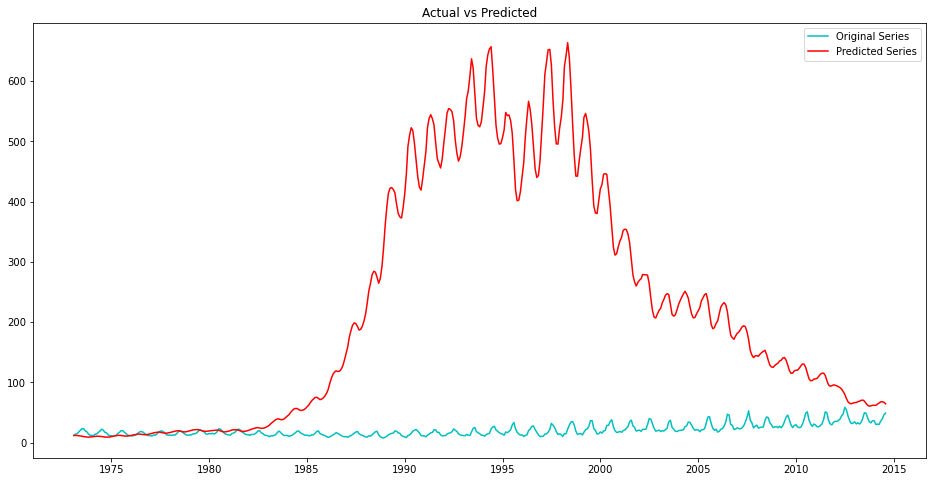

In [45]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(df_train, color = 'c', label = 'Original Series')  #plot the original train series
plt.plot(predictions_ARIMA, color = 'r', label = 'Predicted Series')  #plot the predictions_ARIMA 
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

**Observations & Insights:**
- The prediction is not fitting the original series.


###**Forecast the values for next 24 months and compare it with test data**

In [52]:
#Forecasting the values for next 24 months
forecasted_ARIMA = results_ARIMA.forecast(steps=24) #forecast using the results_ARIMA for next 12 months. Keep steps=12
forecasted_ARIMA[0]

array([3.84084395, 3.8018285 , 3.77041336, 3.74519298, 3.72502175,
       3.70896591, 3.69626439, 3.68629687, 3.67855773, 3.67263489,
       3.66819244, 3.66495661, 3.66270427, 3.66125352, 3.66045613,
       3.66019127, 3.66036045, 3.66088342, 3.66169474, 3.66274108,
       3.66397899, 3.66537304, 3.66689435, 3.66851938])

In [54]:
# Creating a list containing all the forecasted values
list1 = forecasted_ARIMA[0].tolist()
series1 = pd.Series(list1)
series1

0     3.840844
1     3.801829
2     3.770413
3     3.745193
4     3.725022
5     3.708966
6     3.696264
7     3.686297
8     3.678558
9     3.672635
10    3.668192
11    3.664957
12    3.662704
13    3.661254
14    3.660456
15    3.660191
16    3.660360
17    3.660883
18    3.661695
19    3.662741
20    3.663979
21    3.665373
22    3.666894
23    3.668519
dtype: float64

In [55]:
#Making a new dataframe to get the additional dates from 2015-2017
index = pd.date_range('2014-08-01','2016-08-01' , freq='1M')- pd.offsets.MonthBegin(1)
index
df1 = pd.DataFrame()
df1['forecasted'] = series1
df1.index = index
df1

,forecasted
2014-08-01,3.840844
2014-09-01,3.801829
2014-10-01,3.770413
2014-11-01,3.745193
2014-12-01,3.725022
2015-01-01,3.708966
2015-02-01,3.696264
2015-03-01,3.686297
2015-04-01,3.678558
2015-05-01,3.672635


In [56]:
#Applying exponential transformation to the forecasted log values
forecasted_ARIMA = np.exp(df1['forecasted']) #use exponential function on forecasted data
forecasted_ARIMA

2014-08-01    46.564756
2014-09-01    44.782995
2014-10-01    43.398000
2014-11-01    42.317173
2014-12-01    41.472135
2015-01-01    40.811582
2015-02-01    40.296491
2015-03-01    39.896830
2015-04-01    39.589255
2015-05-01    39.355467
2015-06-01    39.181020
2015-07-01    39.054442
2015-08-01    38.966576
2015-09-01    38.910087
2015-10-01    38.879073
2015-11-01    38.868776
2015-12-01    38.875353
2016-01-01    38.895689
2016-02-01    38.927259
2016-03-01    38.968011
2016-04-01    39.016280
2016-05-01    39.070708
2016-06-01    39.130192
2016-07-01    39.193832
Name: forecasted, dtype: float64

Now, let's try to visualize the original data with the predicted values on the training data and the forecasted values.

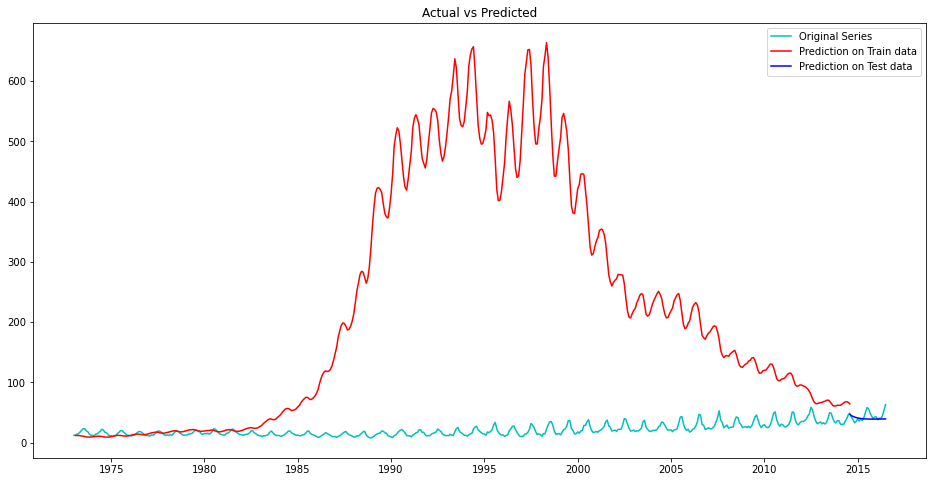

In [57]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(mte, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Prediction on Train data') #plot the predictions_ARIMA series
plt.plot(forecasted_ARIMA, label = 'Prediction on Test data', color='b')  #plot the forecasted_ARIMA series
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

###**Check the RMSE on the original train and test data and write your conclusion from the above analysis.**

In [58]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(predictions_ARIMA, df_train, squared = False) #calculate RMSE using the predictions_ARIMA and df_train 
error

281.59230207471103

In [59]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(forecasted_ARIMA, df_test, squared = False)  #calculate RMSE using the forecasted_ARIMA and df_test
error

8.962197235140447

**Conclusion**
- As we saw before in the validation level there is not fitting between actual and predition on the train data.in the test and forecast we can see somehow fitting, but this no telling that the model is good. we need to take into account first that we failed in prediction, second there is a big differencre between RSME in prediction and forecasting.

We can further try to build more complex time series models like **SARIMA, SARIMAX**, etc. while considering more factors like trend, seasonality, etc. and check if we can get a more generalized model.

We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. The grid search iteratively explore different combinations of the parameters. For each combination of parameters, we will fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. Let's begin by generating the various combination of parameters that we wish to assess:

In [60]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [61]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels.
The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. The lowest AIC refore, we are interested in finding the model that yields the lowest AIC value.

The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

Notes on AIC score: AIC will choose the best model from a set(The “best” model will be the one that neither under-fits nor over-fits.),then consider running a hypothesis test to figure out the relationship between the variables in your model and the outcome of interest.

In [62]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [63]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [64]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4804.065995091217
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4135.625648186415
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2572.1947577443725
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2504.209502835845
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2544.146426616797
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2465.147262997527
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2505.840238070917
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4157.5612255158285
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3572.105901694469
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2334.724725408906
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2245.50738642076
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2329.0446013807305
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2218.6800979008594
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2262.0627979898695
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2247.532772188899
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2932.1335743055997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.012810818768
ARIMA

SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 2003.553452. Therefore, we will consider this to be optimal option out of all the parameter combinations.W e have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

In [65]:
mod = sm.tsa.statespace.SARIMAX(df_train, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = mod.fit()
print(results_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  499
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -947.949
Date:                            Wed, 20 Oct 2021   AIC                           1903.898
Time:                                    22:57:46   BIC                           1920.526
Sample:                                02-01-1973   HQIC                          1910.439
                                     - 08-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6507      0.039     16.578      0.000       0.574       0.728
ma.L1         -0.9564      0.019   

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

<AxesSubplot:xlabel='YYYYMM'>

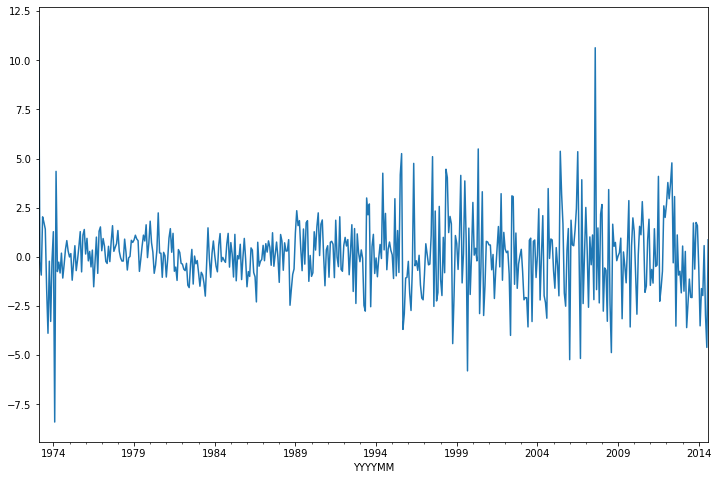

In [66]:
results_sarima.resid.plot(figsize=(12,8))

In [67]:
print(results_sarima.resid.describe())

count    499.000000
mean       0.100816
std        1.894655
min       -8.402031
25%       -0.837977
50%        0.100588
75%        0.951371
max       11.708000
dtype: float64


The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

<AxesSubplot:ylabel='Density'>

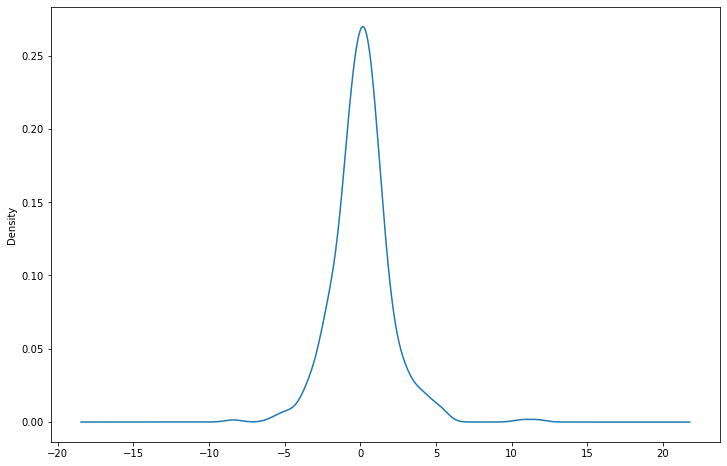

In [68]:
results_sarima.resid.plot(figsize=(12,8),kind='kde')

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

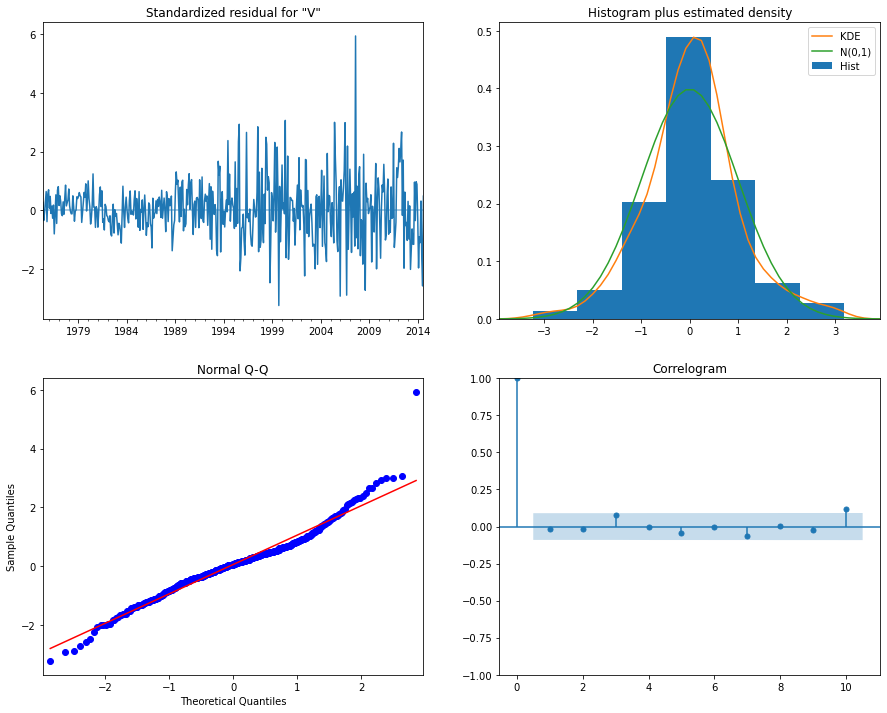

In [69]:
results_sarima.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

The model diagnostic suggests that the model residual is normally distributed based on the following:

In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

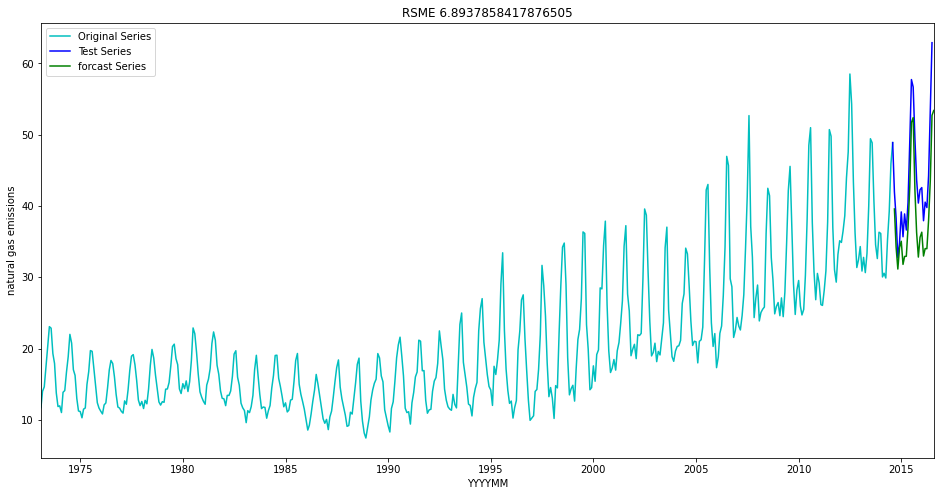

In [70]:
k= 24 # number of features we want to forecast
forecast = results_sarima.forecast(k) # apply the model to forecast out k time step
#Plotting forecast results and display RSME
plt.figure(figsize=(16,8))
# plt.plot(mte, color = 'w', label = 'Original Series')
plt.plot(df_train, color = 'c', label = 'Original Series')
plt.plot(df_test, color = 'b', label = 'Test Series')
plt.plot(forecast,'g', label='forcast Series')
error = mean_squared_error(forecast, df_test, squared = False)  #calculate RMSE using the forecasted_ARIMA and df_test
plt.title('RSME ' + str(error))
plt.xlabel("YYYYMM")
plt.ylabel("natural gas emissions")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

**Validating prediction**

We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecast. The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [79]:
pred = results_sarima.get_prediction(start = 480, end = 521, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Value,upper Value
2013-02-01,29.089482,36.117818
2013-03-01,28.987655,36.015990
2013-04-01,30.724475,37.752811
2013-05-01,32.189642,39.217977
2013-06-01,37.589272,44.617608


<Figure size 1152x576 with 0 Axes>

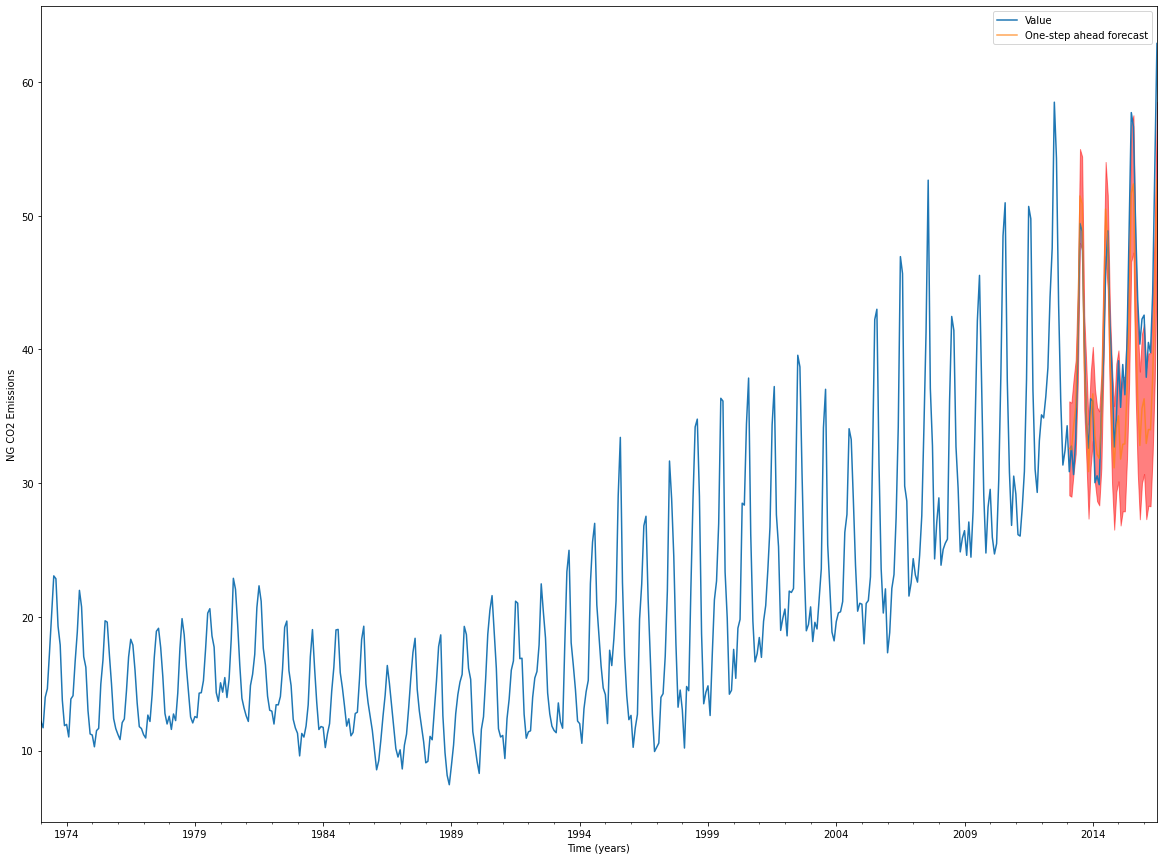

In [80]:
plt.figure(figsize=(16,8))
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)
ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

Overall, our forecasts align with the true values very well, showing an overall similar behavior.

It is also useful to quantify the accuracy of our forecasts. We will use the RMSE  which summarizes the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out.

In [82]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
# mse = ((mte_forecast - mte_truth) ** 2).mean()
mse = mean_squared_error(mte_forecast, mte_truth, squared = False) 
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))


The Mean Squared Error (MSE) of the forecast is 4.61


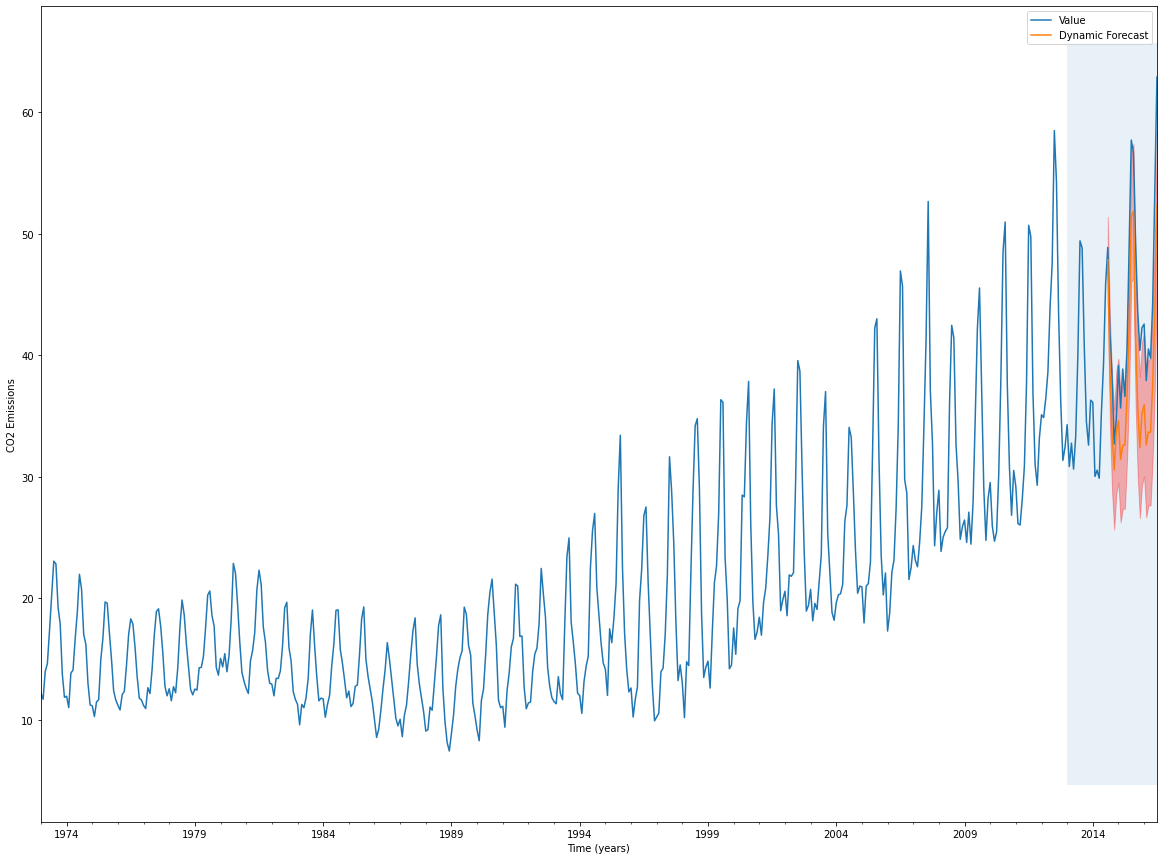

In [85]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2014-08-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [86]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results_sarima.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Value,upper Value
2014-09-01,36.050310,43.078645
2014-10-01,29.942498,38.498801
2014-11-01,26.523959,35.761526
2014-12-01,29.359095,38.948009
2015-01-01,30.138273,39.929444


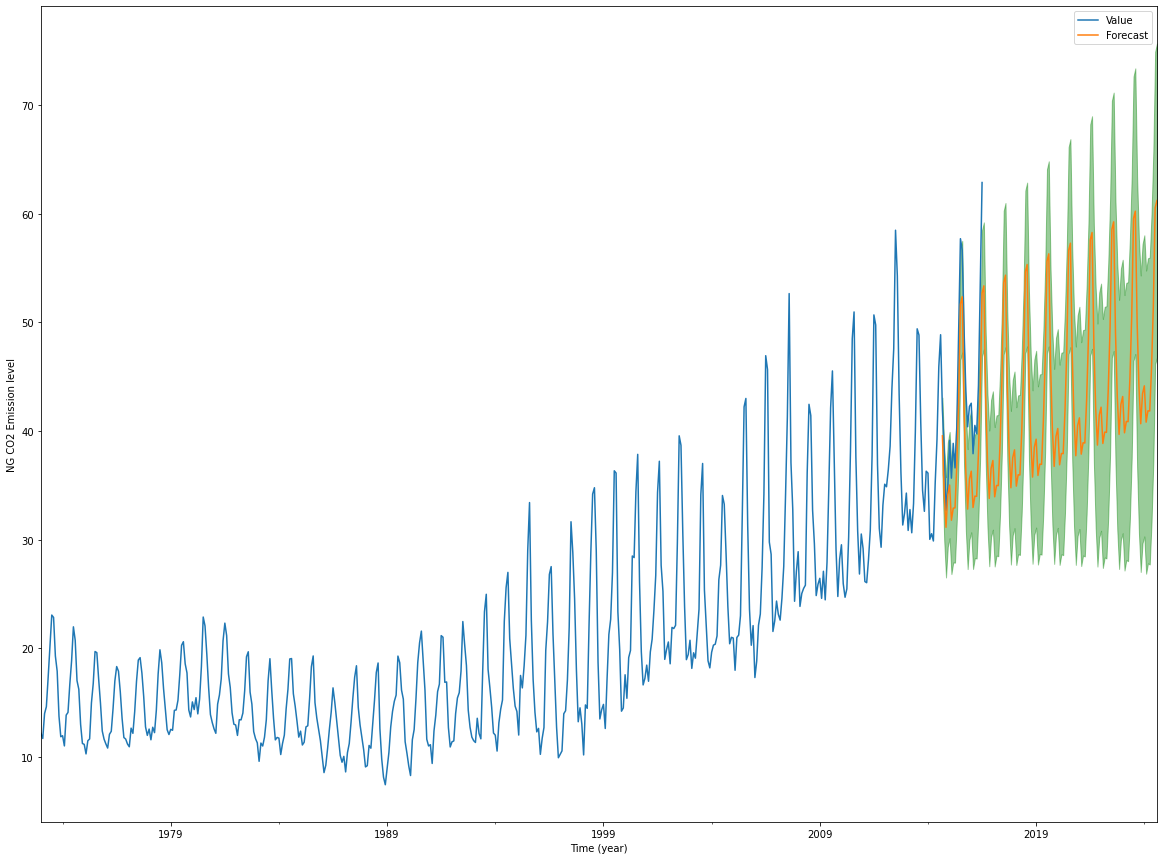

In [87]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()